In [7]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Connect to your postgres DB
conn = psycopg2.connect("dbname=natural_disasters_db user=postgres password=postgres")

# Open a cursor to perform database operations
cur = conn.cursor()

In [3]:
# Execute a query
cur.execute("""
        SELECT fy_declared, COUNT(DISTINCT(disaster_number))
        FROM disasters
        GROUP BY fy_declared
        ORDER BY fy_declared
    """)

# Retrieve query results
records = cur.fetchall()
df = pd.DataFrame(records, columns=["Year", "Number of Disasters"])

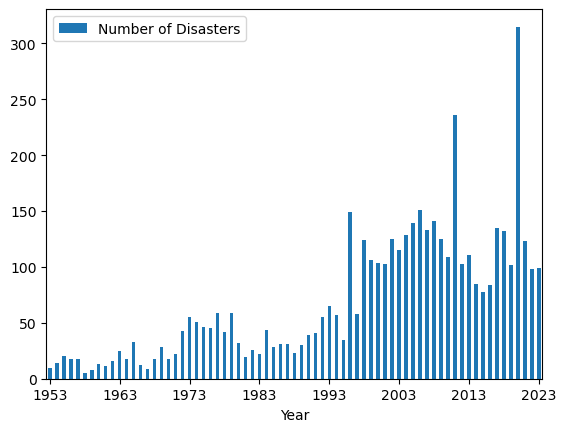

In [18]:
axes = df.plot.bar("Year", "Number of Disasters")
_ = axes.set_xticks(range(0,71,10), labels=range(1953,2024,10), rotation=0)

In [ ]:
cur.close()
conn.close()